### 이상치 정제하기

##### 이상치 : 정상 범위에서 크게 벗어난 값

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({'sex' : [ 1,2,1,3,2,1],
                  'score' : [5,4,3,4,2,6]})

In [3]:
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [5]:
df['sex'].value_counts().sort_index()

1    3
2    2
3    1
Name: sex, dtype: int64

In [6]:
df['score'].value_counts().sort_index()

2    1
3    1
4    2
5    1
6    1
Name: score, dtype: int64

In [13]:
import numpy as np

In [16]:
df['sex'] = np.where(df['sex'] == 3, np.nan ,df['sex'])

In [17]:
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [18]:
df['score'] = np.where(df['score'] > 5 , np.nan,df['score'])

In [19]:
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [21]:
df.dropna(subset = ['sex','score']) \
    .groupby('sex') \
    .agg(mean_age = ('score','mean'))

,mean_age
sex,
1.0,4.0
2.0,3.0


In [22]:
mpg = pd.read_csv('mpg.csv')

In [23]:
import seaborn as sns

<AxesSubplot:ylabel='hwy'>

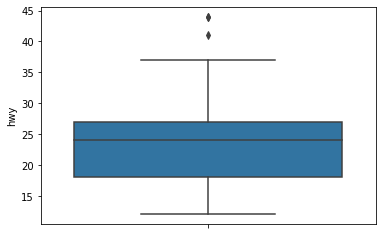

In [24]:
sns.boxplot(data = mpg , y = 'hwy')

In [25]:
pct25 = mpg['hwy'].quantile(.25)

In [26]:
pct25

18.0

In [27]:
pct75 = mpg['hwy'].quantile(.75)

In [28]:
pct75

27.0

In [29]:
iqr = pct75-pct25
iqr

9.0

In [31]:
pct25 - 1.5*iqr #하한

4.5

In [32]:
pct75 + 1.5*iqr #상한

40.5

In [34]:
mpg['hwy'] = np.where((mpg['hwy'] < 4.5)  | (mpg['hwy'] > 40.5),np.nan,mpg['hwy'])

In [35]:
mpg['hwy'].isna().sum()

3

In [39]:
mpg.dropna(subset = ['hwy']) \
     .groupby('drv') \
   .agg(mean_hwy = ('hwy','mean'))
  

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000
